In [17]:
import pandas as pd
import torch
from torchvision import transforms
from PIL import Image
from tiffile import TiffFile
import matplotlib.pyplot as plt
import rasterio

In [2]:
# Legge il file Excel 
df = pd.read_excel(r"C:\Users\giova\OneDrive\Desktop\VS Code folders\SWP-regr\data\UNICO_ZEULI_OLIVO.xlsx", header=1)
df = df[df['DATA  RILIEVO'].isin(['2022-06-23', '2022-08-02'])]
df = df[~df['ID'].isin([31, 52])]
df = df[['DATA  RILIEVO', 'ID', 'SWP']]

C:\Users\giova\AppData\Local\Temp\ipykernel_2824\3177026505.py:3: FutureWarning: The behavior of 'isin' with dtype=datetime64[ns] and castable values (e.g. strings) is deprecated. In a future version, these will not be considered matching by isin. Explicitly cast to the appropriate dtype before calling isin instead.
  df = df[df['DATA  RILIEVO'].isin(['2022-06-23', '2022-08-02'])]


In [3]:
df.columns

Index(['DATA  RILIEVO', 'ID', 'SWP'], dtype='object')

In [23]:
# Inizializza liste vuote per immagini e target
img_names = []
img_paths = []
targets = []
#ID degli alberi
train_idx = [32, 33, 34, 35, 136, 137, 36, 37, 41, 42, 43, 44, 45, 46, 145]
val_idx = [51, 53, 54, 148]
test_idx = [59, 60, 141, 142, 146, 147]

# Loop sulle righe del DataFrame
for index, row in df.iterrows():

  if row["ID"] not in val_idx:
    continue
  # Estrae info
  date = str(row["DATA  RILIEVO"])
  if "2022-06-23" in date:
    day = "3 Zeuli 220623"
  elif "2022-08-02" in date:
    day = "5 Zeuli 220802"
  tree_id = row["ID"]
  target = row["SWP"]

  # Determina il percorso dell'immagine
  img_name = f"11_{day} Albero {tree_id}.tif" 
  img_path = f"C:\\Users\\giova\\OneDrive\\Desktop\\VS Code folders\\SWP-regr\\data\\DATASET\\val\\{img_name}"
  print(img_path)

  img_paths.append(img_path)
  targets.append(target)

with open(r'C:\Users\giova\OneDrive\Desktop\VS Code folders\SWP-regr\data\val_set.csv', 'w') as f:
  f.write('img_path, SWP\n')
  for img_path, target in zip(img_paths, targets):
    f.write(f'{img_path}, {target}\n')
  

'''
  # Carica e trasforma immagine
  #img = Image.open(img_path)
  with TiffFile(img_path) as tif:
    img = tif.asarray()
  transform = transforms.ToTensor()
  img = transform(img)

  # Aggiunge al dataset
  img_names.append(img_name)
  img_paths.append(img)
  targets.append(target)

# Salva il dataset 
dataset = {
  "img_names": img_names,
  "images": img_paths,
  "targets": targets
}

torch.save(dataset, "trees_test.pt")
'''

C:\Users\giova\OneDrive\Desktop\VS Code folders\SWP-regr\data\DATASET\val\11_3 Zeuli 220623 Albero 51.tif
C:\Users\giova\OneDrive\Desktop\VS Code folders\SWP-regr\data\DATASET\val\11_3 Zeuli 220623 Albero 53.tif
C:\Users\giova\OneDrive\Desktop\VS Code folders\SWP-regr\data\DATASET\val\11_3 Zeuli 220623 Albero 54.tif
C:\Users\giova\OneDrive\Desktop\VS Code folders\SWP-regr\data\DATASET\val\11_3 Zeuli 220623 Albero 148.tif
C:\Users\giova\OneDrive\Desktop\VS Code folders\SWP-regr\data\DATASET\val\11_5 Zeuli 220802 Albero 51.tif
C:\Users\giova\OneDrive\Desktop\VS Code folders\SWP-regr\data\DATASET\val\11_5 Zeuli 220802 Albero 53.tif
C:\Users\giova\OneDrive\Desktop\VS Code folders\SWP-regr\data\DATASET\val\11_5 Zeuli 220802 Albero 54.tif
C:\Users\giova\OneDrive\Desktop\VS Code folders\SWP-regr\data\DATASET\val\11_5 Zeuli 220802 Albero 148.tif


'\n  # Carica e trasforma immagine\n  #img = Image.open(img_path)\n  with TiffFile(img_path) as tif:\n    img = tif.asarray()\n  transform = transforms.ToTensor()\n  img = transform(img)\n\n  # Aggiunge al dataset\n  img_names.append(img_name)\n  img_paths.append(img)\n  targets.append(target)\n\n# Salva il dataset \ndataset = {\n  "img_names": img_names,\n  "images": img_paths,\n  "targets": targets\n}\n\ntorch.save(dataset, "trees_test.pt")\n'

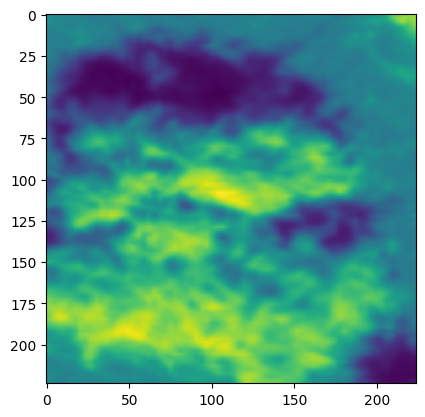

In [22]:
test_set = pd.read_csv(r'C:\Users\giova\OneDrive\Desktop\VS Code folders\SWP-regr\data\test_set.csv', header=0)
for img_path in test_set.img_path:
    img = rasterio.open(img_path)
    img_data = img.read()
    plt.imshow(img_data[4])
    #plt.show()
    img.close()

In [27]:
# Converte in DataFrame
df2 = pd.DataFrame(dataset)

# Seleziona solo le colonne di interesse
df2 = df2[['img_names', 'targets']]

# Stampa le prime 50 righe 
print(df2.head(50))

                           img_names  targets
0    11_3 Zeuli 220623 Albero 59.tif      9.0
1    11_3 Zeuli 220623 Albero 60.tif      8.0
2   11_3 Zeuli 220623 Albero 141.tif      4.0
3   11_3 Zeuli 220623 Albero 142.tif      8.6
4   11_3 Zeuli 220623 Albero 146.tif      9.4
5   11_3 Zeuli 220623 Albero 147.tif      7.4
6    11_5 Zeuli 220802 Albero 59.tif     32.4
7    11_5 Zeuli 220802 Albero 60.tif     13.0
8   11_5 Zeuli 220802 Albero 141.tif     28.2
9   11_5 Zeuli 220802 Albero 142.tif     22.0
10  11_5 Zeuli 220802 Albero 146.tif     27.0
11  11_5 Zeuli 220802 Albero 147.tif     31.2


In [28]:
# Carica il dataset 
dataset = torch.load('trees_test.pt')

# Verifica dimensioni
print(f"Numero di immagini: {len(dataset['images'])}")
print(f"Numero di target: {len(dataset['targets'])}")

# Stampa alcuni esempi 
print("Esempi:")
for i in range(5):
  img = dataset['images'][i]
  target = dataset['targets'][i]
  
  print(f"Immagine {i}")
  print(f"- Shape tensor: {img.shape}") 
  print(f"- Target: {target}")
  print()

Numero di immagini: 12
Numero di target: 12
Esempi:
Immagine 0
- Shape tensor: torch.Size([11, 224, 224])
- Target: 9

Immagine 1
- Shape tensor: torch.Size([11, 224, 224])
- Target: 8

Immagine 2
- Shape tensor: torch.Size([11, 224, 224])
- Target: 4

Immagine 3
- Shape tensor: torch.Size([11, 224, 224])
- Target: 8.6

Immagine 4
- Shape tensor: torch.Size([11, 224, 224])
- Target: 9.4

